## Функции 

In [1]:
import numpy as np
def line (k,x,b):
    return k*x+b
def sin(x):
    return np.sin(x)
def cos(x):
    return np.cos(x)
def quadratic_equation(x,a,b,c):
    return a*x**2 + b*x + c
def biquadratic_equation(x,a,b,c):
    return  a*x**4 + b*x**2 + c

## Метод 1


In [6]:

def bisection(x_init,x_fin,f,epsilon=1e-6):
    if f(x_init) * f(x_fin) >= 0:
        raise ValueError("На концах интервала одинаковые знаки")
    xinit = x_init
    xfin = x_fin
    while abs(xfin - xinit) > epsilon:
        # середина промежутка
        xmed = (xinit + xfin) / 2
        
        if f(xmed) == 0:
            return xmed
        
        # в какой половине корень
        if f(xinit) * f(xmed) < 0:
            #первая половина с корнем
            xfin = xmed
        else:
            # вторая половина с корнем
            xinit = xmed
    
    # середина конечного интервала
    return (xinit + xfin) / 2
    

## Метод 2

In [ ]:
def simple_iteration ():
    return 0


## Метод 3

In [ ]:
def Newton ():
    return 0

## Линейные уравнения

Уравнение: 1x + 3 = 0, корень: x = -3.000
Уравнение: 5x + -10 = 0, корень: x = 2.000
Уравнение: -1x + 0 = 0, корень: x = 0.000


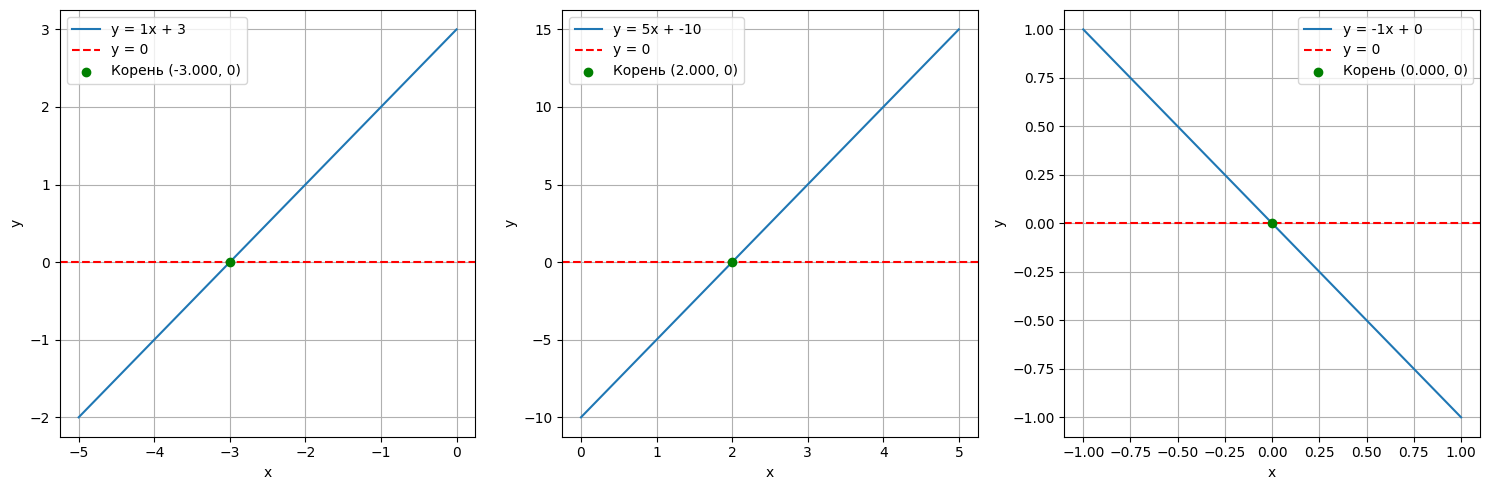

In [ ]:
"""
kx+b=0
(k=1,b=3)
(k=5,b=-10)
(k=-1,b=0)
"""
import matplotlib.pyplot as plt  
equations = [
    {'k': 1, 'b': 3, 'interval': (-5, 0)},   # x + 3 = 0 -> корень ~ -3
    {'k': 5, 'b': -10, 'interval': (0, 5)},  # 5x - 10 = 0 -> корень 2
    {'k': -1, 'b': 0, 'interval': (-2, 2)}   # -x = 0 -> корень 0
]

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, eq in enumerate(equations):
    k, b, interval = eq['k'], eq['b'], eq['interval']
    f = lambda x: line(k, x, b)
    
    # Нахождение корня
    try:
        root = bisection(interval[0], interval[1], f)
        print(f"Уравнение: {k}x + {b} = 0, корень: x = {root:.3f}")
    except ValueError as e:
        print(f"Ошибка для уравнения {k}x + {b}: {e}")
        continue
    
    # Построение графика
    x_vals = np.linspace(interval[0], interval[1], 1000)
    y_vals = f(x_vals)
    
    ax = axes[idx]
    ax.plot(x_vals, y_vals, label=f'y = {k}x + {b}')
    ax.axhline(0, color='red', linestyle='--', label='y = 0')
    ax.scatter(root, 0, color='green', zorder=5, label=f'Корень ({root:.3f}, 0)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Квадратичные и биквадратичные

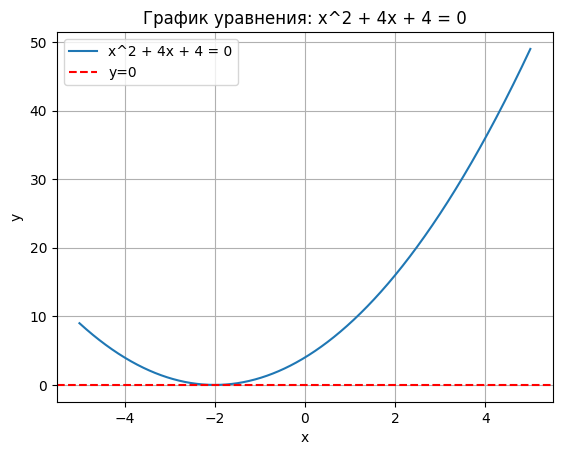

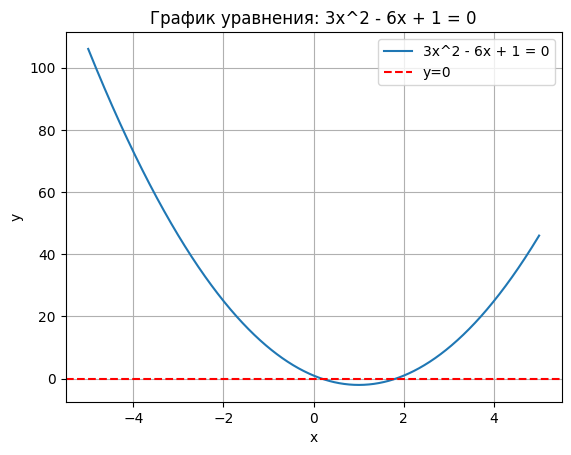

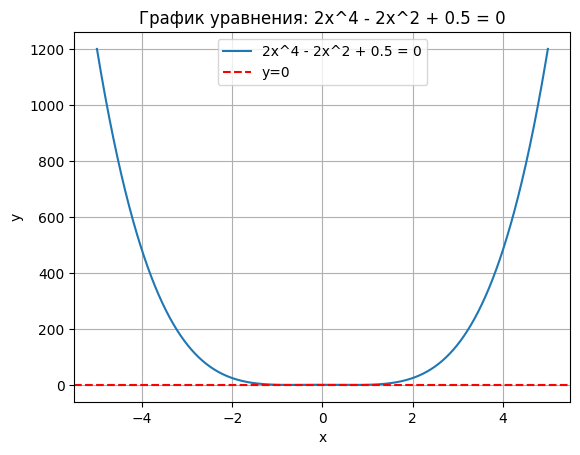

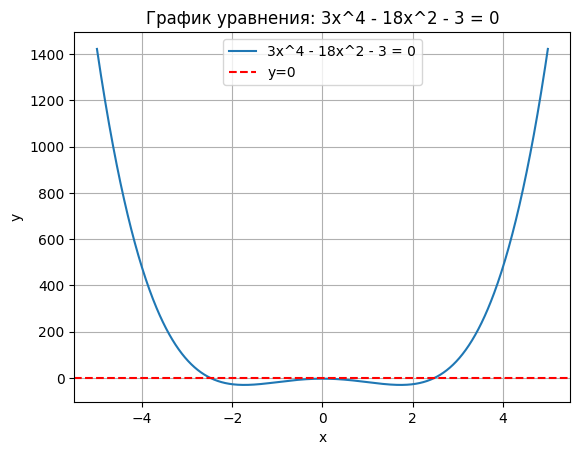

In [ ]:
"""
x^2+4x+4=0
3x^2-6x+1=0
2x^4-2x^2+0.5=0
3x^4-18x^2-3=0
"""
equations = [
    {"name": "x^2 + 4x + 4 = 0", "func": lambda x: quadratic_equation(x, 1, 4, 4)},
    {"name": "3x^2 - 6x + 1 = 0", "func": lambda x: quadratic_equation(x, 3, -6, 1)},
    {"name": "2x^4 - 2x^2 + 0.5 = 0", "func": lambda x: biquadratic_equation(x, 2, -2, 0.5)},
    {"name": "3x^4 - 18x^2 - 3 = 0", "func": lambda x: biquadratic_equation(x, 3, -18, -3)}
]

x_range = np.linspace(-5, 5, 1000)

for eq in equations:
    plt.figure()
    y = eq["func"](x_range)
    plt.plot(x_range, y, label=eq["name"])
    plt.axhline(0, color='red', linestyle='--', label='y=0')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'График уравнения: {eq["name"]}')
    plt.legend()
    plt.grid(True)
    plt.show()
    

## Тригонометрические

In [ ]:
"""
sinx=3^(1/2)/2
cos(2pi)=-sin^2(x)+(1/9)
"""